In [ ]:
# -------- Code Outline -------- #
# This code de-noises the raw ECG using discrete wavelet transforms using a db4 wavelet

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import pywt 
from pywt import wavedec
import scipy
from scipy import signal

In [2]:
def lowpassfilter(signal, thresh = 0.003, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="smooth")
    coeff[17:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[17:])
    #coeff[:11] = (pywt.threshold(i, value=10, mode="soft" ) for i in coeff[:11])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="smooth" )
    return reconstructed_signal

In [3]:
with open('Data Extraction/Raw Data/afdb_arrays/1_array.pkl', 'rb') as f:
    Data = pickle.load(f)

AttributeError: 'function' object has no attribute 'set_size_inches'

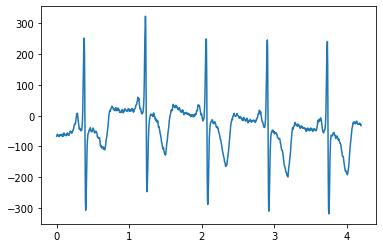

In [8]:
x = np.arange(1050)
plt.plot(x/250,Data[1550:2600])
plt.figure.set_size_inches(18.5, 10.5)
plt.xlabel('Time (sec)')
plt.ylabel('Original Signal (mV)')
#plt.savefig("Orignal_Signal_Normal", bbox_inches="tight")

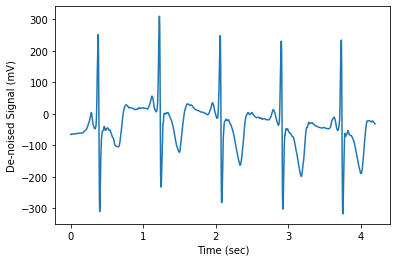

In [193]:
ND = lowpassfilter(Data,thresh=0.004,wavelet='db4')
x = np.arange(1050)
plt.plot(x/250,ND[1550:2600])
plt.xlabel('Time (sec)')
plt.ylabel('De-noised Signal (mV)')
plt.savefig("De-Noised_Signal_Normal", bbox_inches="tight")

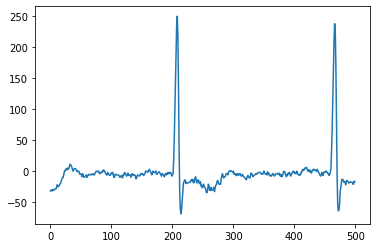

In [59]:
plt.plot(Data[:500])

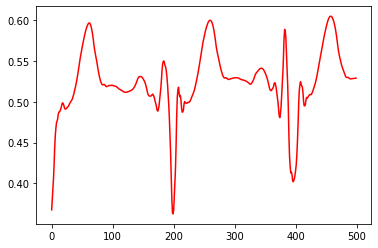

In [66]:
coeffs = wavedec(Data, 'db4', level = 7)
coeffs[-1] = np.zeros_like(coeffs[-1])
coeffs[6] = np.zeros_like(coeffs[6])
coeffs[-3] = np.zeros_like(coeffs[-3])
#coeffs[0] = np.zeros_like(coeffs[0])
# coeffs[-4] = np.zeros_like(coeffs[-4])
# coeffs[-5] = np.zeros_like(coeffs[-5])
Data_new = pywt.waverec(coeffs,'db4')
plt.plot(Data_new[:500], c ='r')
plt.show()

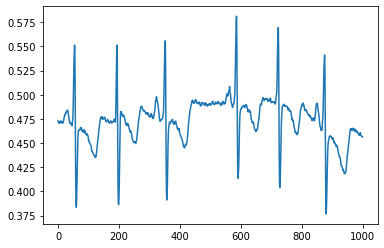

In [21]:
plt.plot(Data[:1000])

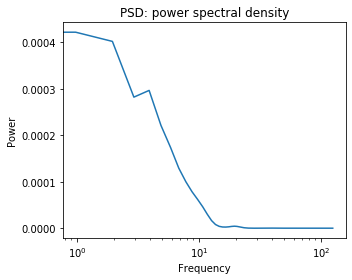

In [709]:
freqs, psd = signal.welch(Data_new, 250, scaling = 'density')

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [710]:
# wavelet = pywt.Wavelet('db4')
# print(wavelet)
# 
# wavelet_function, scaling_function, x_values = wavelet.wavefun(level = 5)
# plt.plot(x_values, wavelet_function)
# peaks = scipy.signal.find_peaks_cwt(Data_new, )
# plt.plot(t[peaks],signal_w_noise[peaks],'ro')

In [711]:
# filename = '124DN'

# This line uses pickle to save the de noised array as a .pkl file
# with open('{}.pkl'.format(filename), 'wb') as f:
#     pickle.dump(Data_new, f)